In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv


# Dataset 

This dataset is originally from the UCI Machine Learning Repository:  

Dua, D. and Graff, C. (2019).  
UCI Machine Learning Repository [http://archive.ics.uci.edu/ml].  
Irvine, CA: University of California, School of Information and Computer Science.  

The dataset was introduced in the following paper:  

Abdullah Al Imran, Md Shamsur Rahim, Tanvir Ahmed (2021).  
*Mining the productivity data of the garment industry.*  
International Journal of Business Intelligence and Data Mining.

https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

# Dataset Information

* 01	date			:	Date in MM-DD-YYYY
* 02	day			:	Day of the Week
* 03	quarter			:	A portion of the month. A month was divided into four quarters
* 04	department		:	Associated department with the instance
* 05	team_no			:	Associated team number with the instance
* 06	no_of_workers		:	Number of workers in each team
* 07	no_of_style_change	:	Number of changes in the style of a particular product
* 08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
* 09	smv			:	Standard Minute Value, it is the allocated time for a task
* 10	wip			:	Work in progress. Includes the number of unfinished items for products
* 11	over_time		:	Represents the amount of overtime by each team in minutes
* 12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* 13	idle_time		:	The amount of time when the production was interrupted due to several reasons
* 14	idle_men		:	The number of workers who were idle due to production interruption
* 15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
df = pd.read_csv("/kaggle/input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


## Null Values


In [6]:
df.isnull().sum() #null values check

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [8]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Categorical Unique Values Control


In [9]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [10]:
df["department"] = df["department"].str.strip() #remove unnecessary spaces

In [11]:
cols = ["department","day","quarter"]
for x in cols:
    print(df[x].value_counts())

department
sweing       691
finishing    506
Name: count, dtype: int64
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


## Df["wip"] nan values

In [12]:
nan = df["wip"].isna()
na_counts = df.loc[nan, 'department'].value_counts()
nan_counts = df.loc[~nan,'department'].value_counts()

In [13]:
shows = [na_counts,nan_counts]
for item in shows:
    print(f"{item}\n")


department
finishing    506
Name: count, dtype: int64

department
sweing    691
Name: count, dtype: int64



In [14]:
df["wip_missing"] = df["wip"].isna().astype(int) # Im not sure if the "finishing" department records wip.
                                                 #That's why We created "wip_missing" column

In [15]:
df.insert( 
    df.columns.get_loc('wip') + 1,
    'wip_missing',
    df.pop('wip_missing')
)

#We moved the "wip_missing" column next to the "wip" column

In [16]:
df['wip'] = df['wip'].fillna(0) #We filled the "Nan" values in the "wip" column with 0

In [17]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,wip_missing,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,1,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,1,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,1,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,1,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1,1800,0,0.0,0,0,15.0,0.505889


## Drop the df["date"]

In [18]:
df.drop(["date"],axis=1,inplace=True)

## Encoding

In [19]:
df["quarter"].value_counts()


quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [20]:
df["day"].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [21]:
label_encoder = LabelEncoder()
ord_quarter_order = ["Quarter1","Quarter2","Quarter3","Quarter4","Quarter5"]
ordinal_encoder = OrdinalEncoder(categories=[ord_quarter_order])

ord_day_order = ["Monday","Tuesday","Wednesday","Thursday","Saturday","Sunday"] 
ordinal_encoder_day = OrdinalEncoder(categories=[ord_day_order])
# we have 6 days in dataset excluded friday

df["department"] = label_encoder.fit_transform(df["department"])

df["quarter"] = ordinal_encoder.fit_transform(df[["quarter"]])
df["day"] = ordinal_encoder_day.fit_transform(df[["day"]])

In [22]:
df["quarter"].value_counts()


quarter
0.0    360
1.0    335
3.0    248
2.0    210
4.0     44
Name: count, dtype: int64

In [23]:
df["day"].value_counts()

day
2.0    208
5.0    203
1.0    201
3.0    199
0.0    199
4.0    187
Name: count, dtype: int64

In [24]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,wip_missing,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,1,3.0,8,0.80,26.16,1108.0,0,7080,98,0.0,0,0,59.0,0.940725
1,0.0,0,3.0,1,0.75,3.94,0.0,1,960,0,0.0,0,0,8.0,0.886500
2,0.0,1,3.0,11,0.80,11.41,968.0,0,3660,50,0.0,0,0,30.5,0.800570
3,0.0,1,3.0,12,0.80,11.41,968.0,0,3660,50,0.0,0,0,30.5,0.800570
4,0.0,1,3.0,6,0.80,25.90,1170.0,0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1.0,0,2.0,10,0.75,2.90,0.0,1,960,0,0.0,0,0,8.0,0.628333
1193,1.0,0,2.0,8,0.70,3.90,0.0,1,960,0,0.0,0,0,8.0,0.625625
1194,1.0,0,2.0,7,0.65,3.90,0.0,1,960,0,0.0,0,0,8.0,0.625625
1195,1.0,0,2.0,9,0.75,2.90,0.0,1,1800,0,0.0,0,0,15.0,0.505889


## Correlation

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


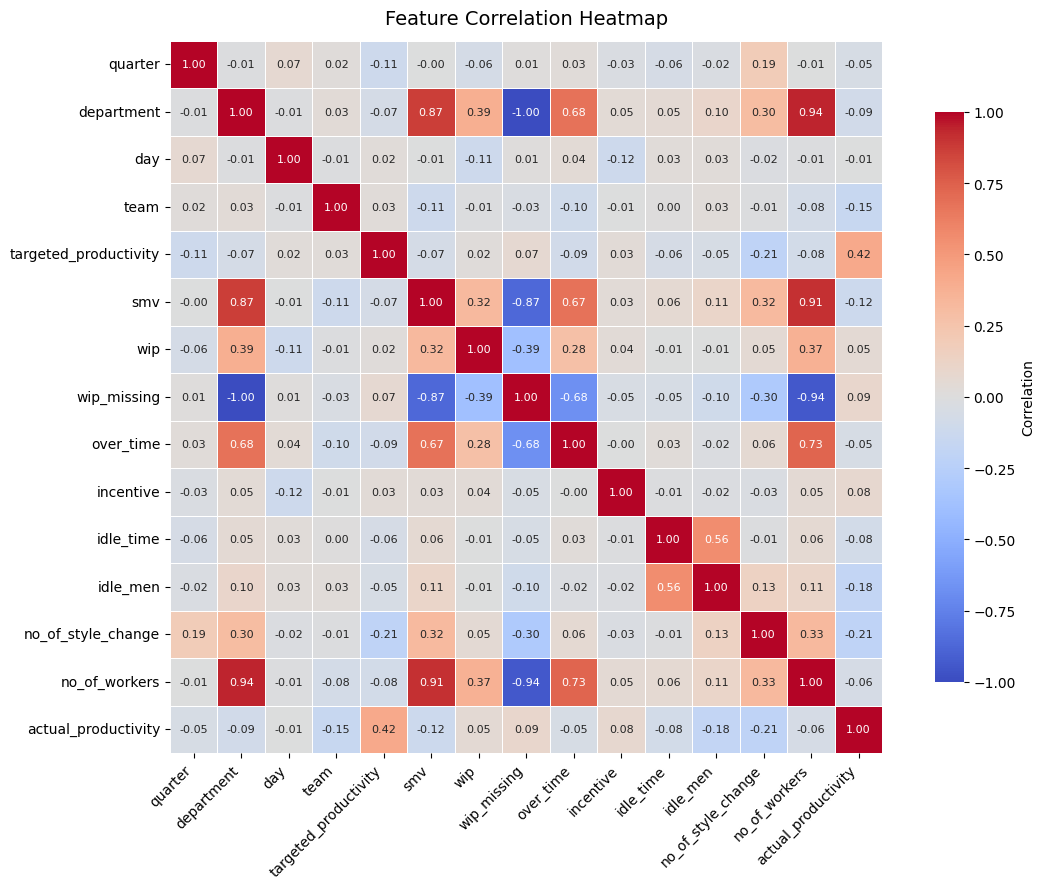

In [25]:
plt.figure(figsize=(12, 9))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 8}
)

plt.title("Feature Correlation Heatmap", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()